# Dynamical Systems and Chaos Theory
## Bifurcation Diagram of the Logistic Map
In this notebook, we will explore how the behavior of a dynamical system can shift from a non-chaotic system to a chaotic system depending on one paremeter. In this case, we we will look at the logistic map and how it changes with the growth rate `r`.

#### The Logistic Map
The logistic map is a simple nonlinear recurrence relation that models how a population changes over time:
$$
x_{n+1} = r \cdot x_n \cdot (1 - x_n)
$$
where:  
- $x_{n}$ is the **population** at time step $n$, scaled between 0 and 1  
- $r$ is the **growth rate**  
- $(1 - x_{n})$ represents **limited resources** or competition  

This equation allows us to look at how the growth of the population is fast at low population sizes but is slowed down as the population nears the carrying capacity $(x \approx 1)$. This captures **self-limiting growth**, a common pattern in nature.

We will demonstrate how changing $r$ can shift the dynamics of our population.

In [61]:
# pip install matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt

We first define the logistic map equation:

In [5]:
def logistic_map(x,r):
    return r * x * (1-x)

We then look at varying $r$ values:

In [55]:
r_values = np.linspace(0,4,1000)

Then we initialize $x$ to 0.5 for all $r$ values.

In [56]:
x = np.ones_like(r_values)*0.5

We can now iterate the logistic map, let's try 1000 iterations and plot the last 100 points.

In [57]:
# x_temp = 0.5
# r_temp = 2
# ts_temp = []
# iters = 1000
# for i in range (iters):
#     x_temp = logistic_map(x_temp, r_temp)
#     ts_temp.append(x_temp)

In [58]:
# plt.plot(ts_temp)

In [59]:
iters = 10000
last = 100
rs = []
xs = []

for i in range(iters):
    x = logistic_map(x, r_values)
    if i >= iters - last:
        rs.extend(r_values)
        xs.extend(x)

Let's plot the bifurcation diagram:

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

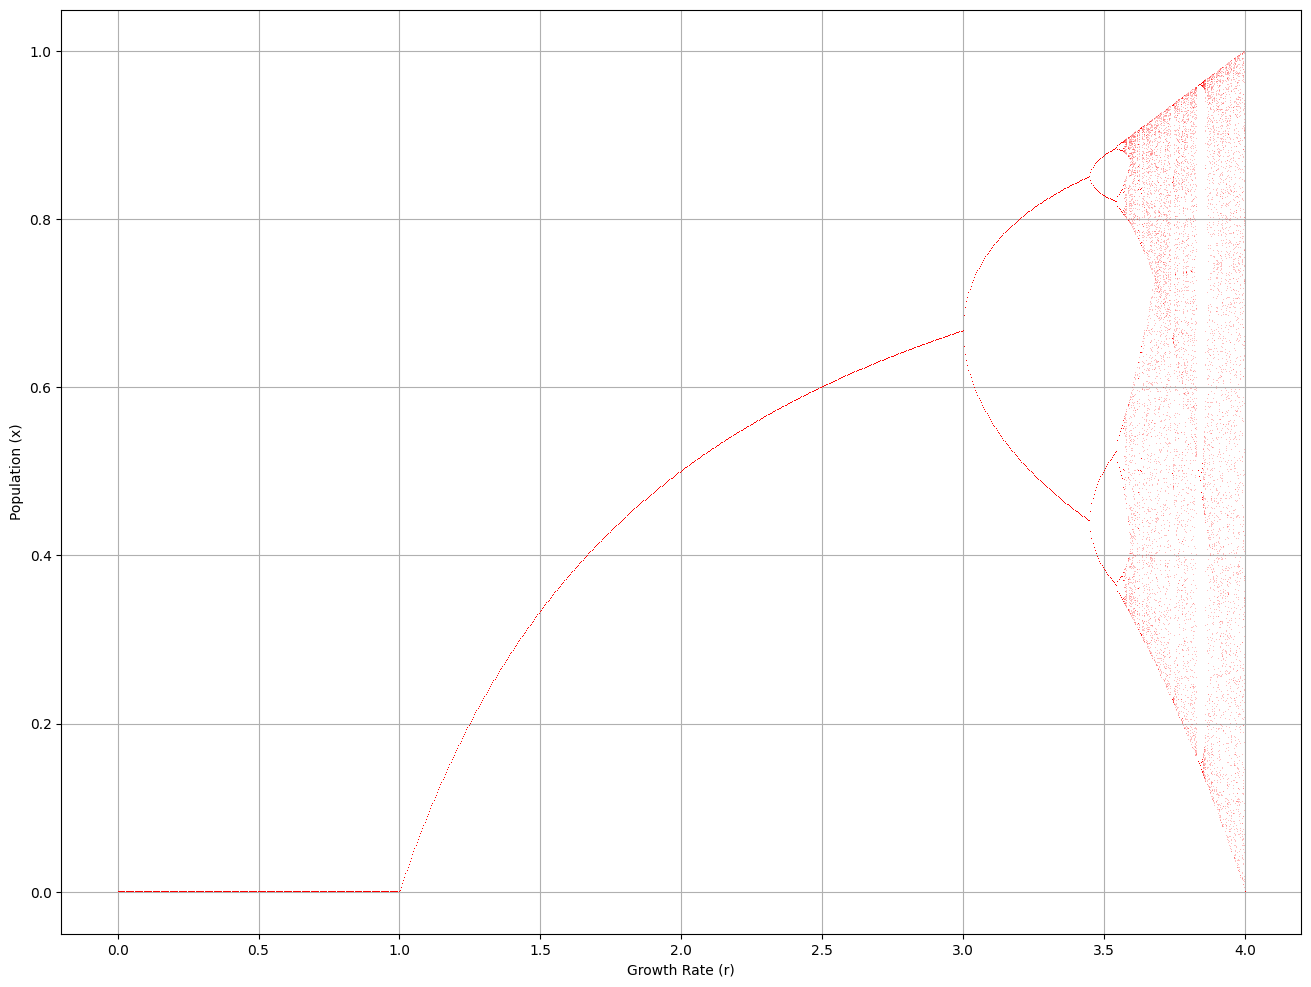

In [64]:
plt.figure(figsize=(16,12))
plt.plot(rs, xs,',r',alpha=0.25)
plt.xlabel("Growth Rate (r)")
plt.ylabel("Population (x)")
plt.grid(True)
plt.tight_layout

#### Questions
1. How dow we interpret the behavior of the system? There are four states that our system can take based on this chart.
2. What will happen if we change our initial conditions?

Let's try to zoom in on the difference of the behavior in the chaotic state:

In [70]:
r_values = np.linspace(3.5,4,1000)
x = np.ones_like(r_values)*0.5
iters = 10000
last = 100
rs = []
xs = []

for i in range(iters):
    x = logistic_map(x, r_values)
    if i >= iters - last:
        rs.extend(r_values)
        xs.extend(x)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

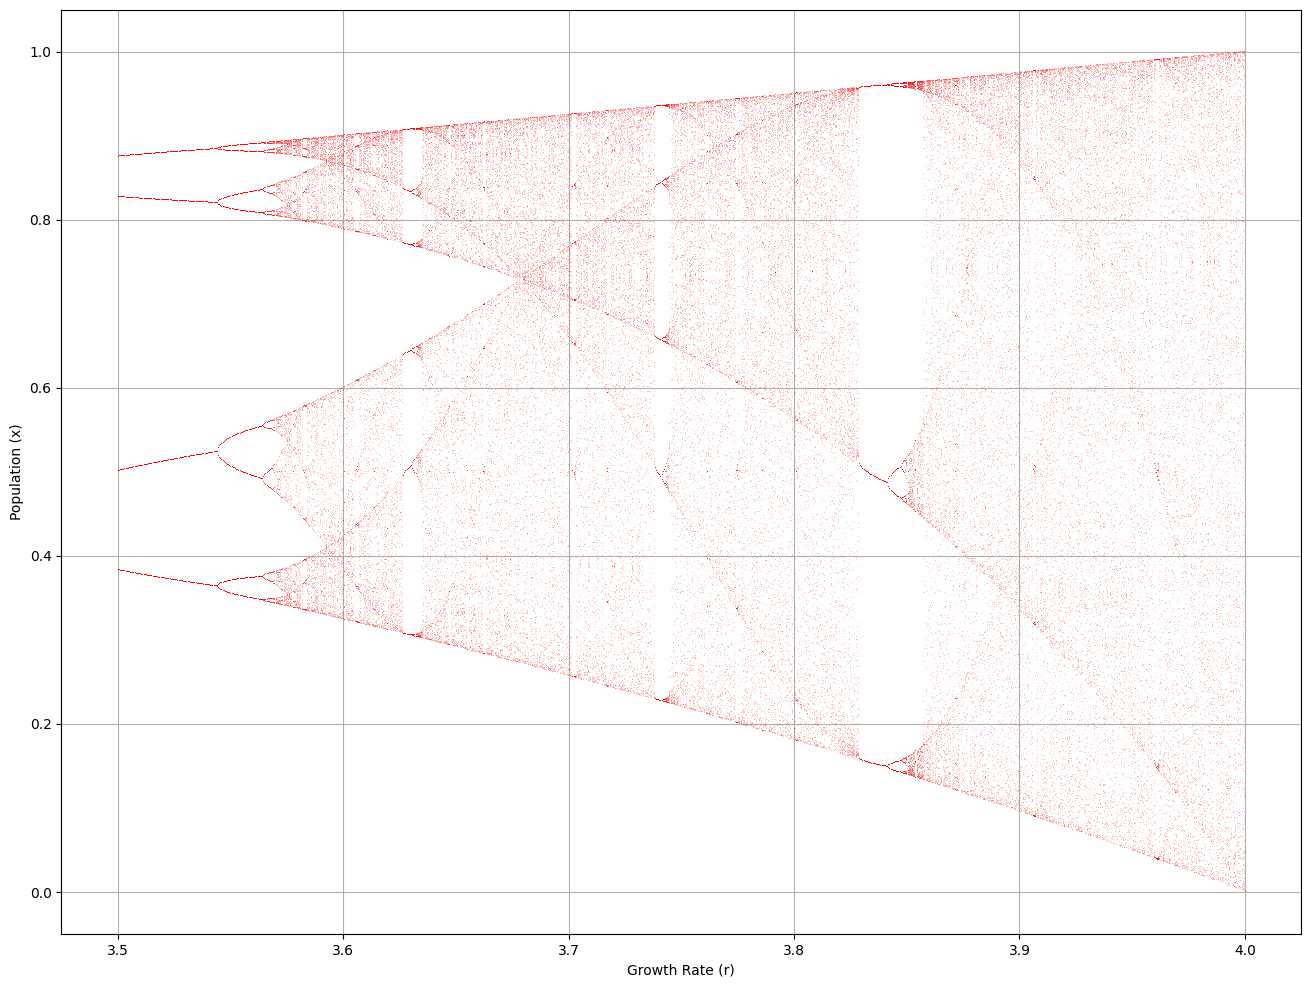

In [71]:
plt.figure(figsize=(16,12))
plt.plot(rs, xs,',r',alpha=0.25)
plt.xlabel("Growth Rate (r)")
plt.ylabel("Population (x)")
plt.grid(True)
plt.tight_layout

In [80]:
def zoom_plot(r=3.8,x0_values=[0.5, 0.5001, 0.5002, 0.5003], steps=50):
    plt.figure(figsize=(10,6))
    for x0 in x0_values:
        x = x0
        traj = []
        for _ in range(steps):
            x = logistic_map(x,r)
            traj.append(x)
        plt.plot(traj, label=f"x0 = {x0}")
    plt.title(f"Zoom-In: Divergence at r={r}")
    plt.xlabel("Time Step")
    plt.ylabel("x")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

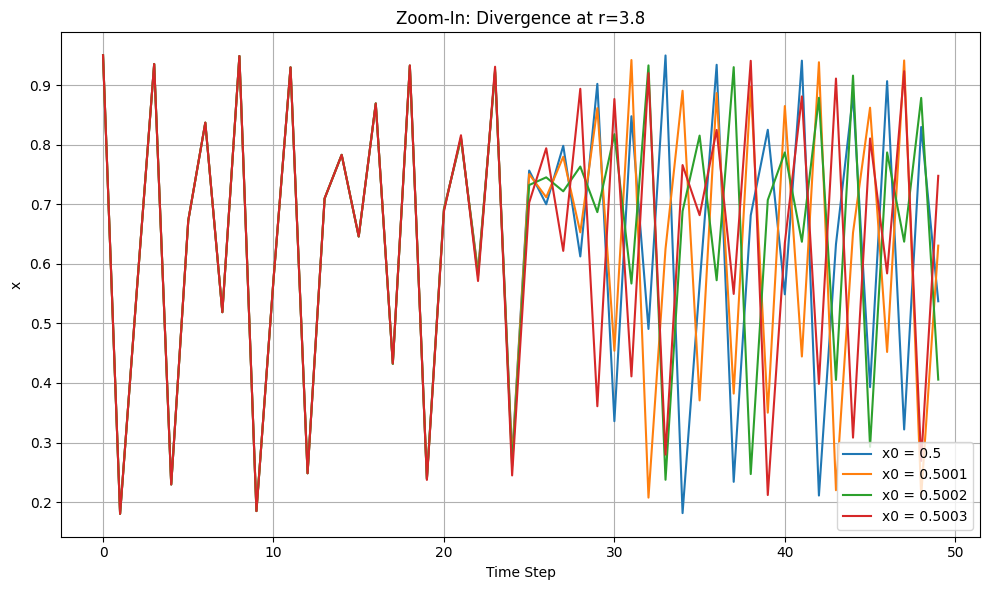

In [81]:
zoom_plot()

How does the behavior change after a few time steps?

## The beauty of the logistic map
Even though the logistic map is incredibly simple, it:
- Shows period doubling, bifurcations, and chaos
- Helps demonstrate how nonlinear systems can behave unpredictably
- Serves as a gateway to understanding complex systems and chaos theory

## Exercise
Another famous example of a simple dynamical chaotic system is the Henon Map given by:  
$x_{n+1} = 1 - a x_n^2 + y_n$  
$y_{n+1} = b x_n$  
Using the chaotic case parameters: $a = 1.4$ and $b = 0.3$, create a phase space map of $x$ and $y$ for the first 10,000 points in the system.


In [78]:
def x_map(x,y,a=1.4):
    return 1 - (a * x ** 2) + y

In [79]:
def y_map(x, b=0.3):
    return b * x

In [82]:
n = 10000

x_vals = np.zeros(n)
y_vals = np.zeros(n)

x_vals[0], y_vals[0] = 0.1, 0.0

for n in range(1, n):
    x_vals[n] = x_map(x_vals[n-1], y_vals[n-1])
    y_vals[n] = y_map(x_vals[n-1])

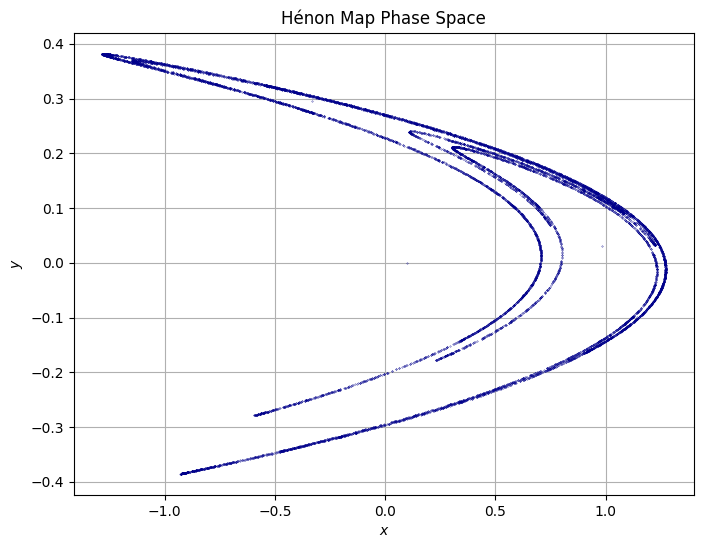

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, '.', markersize=0.5, color='darkblue')
plt.title("Hénon Map Phase Space")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.show()